# Second Assignment
Giovanni Celotto
## Exercise 1
A set of measurements have been performed on the concentration of a contaminant
in tap water. The following tables reports a set of values (x), with the corresponding
probabilities given by the two methods (p1 and p2 )

| x  | 15.58 | 15.9 | 16   | 16.1 | 16.2 |
| ---|------ |------|---   | ---- | ---- |
| p1 | 0.15  | 0.21 | 0.35 | 0.15 | 0.14 |
| p2 | 0.14  | 0.05 | 0.64 | 0.08 | 0.09 |

* Evaluate the expected values, E[X], and the variance, Var(X), for both methods

In [1]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2 )
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
cat("Check normalization for 1st method:\t", sum(p1),"\n")
cat("Check normalization for 2nd method:\t", sum(p2), "\n\n")


#define a function that will be useful for expectation value:
exp_val <- function (x, px){
        return (sum(x*px))
}


#define a function for the variance for discrete distributions:
my_var <- function (x, px){
    return (exp_val(x^2, px) - (exp_val(x, px))^2)
}

cat("Expecation value for the 1st method:\t", exp_val(x, p1), "\n")
cat("Variance for the 1st method:\t\t", my_var(x, p1), "\n")


cat("Expecation value for the 2nd method:\t", exp_val(x, p2), "\n")
cat("Variance for the 2nd method:\t\t", my_var(x, p2), "\n")


Check normalization for 1st method:	 1 
Check normalization for 2nd method:	 1 

Expecation value for the 1st method:	 15.959 
Variance for the 1st method:		 0.033979 
Expecation value for the 2nd method:	 15.9622 
Variance for the 2nd method:		 0.02816716 


## Exercise 2
The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30

A) simulate the waiting time for 50 people at the doctor’s office and plot the relative
histogram

B) what is the probability that a person will wait for less than 10 minutes ?

C) evaluate the average waiting time from the simulated data and compare it with
the expected value (calculated from theory and by manipulating the probability
distributions using R)

D) what is the probability for waiting more than one hour before being received ?

In [2]:
#x and y values to be plotted
x <- seq(0, 100, 0.01)
pdf <- dexp(x, 1/30)
options(repr.plot.width=7, repr.plot.height=4) 


#define number of random values and array of waiting times
npeople <- 50
set.seed(1098)
waiting_time <- rexp(npeople, 1/30)

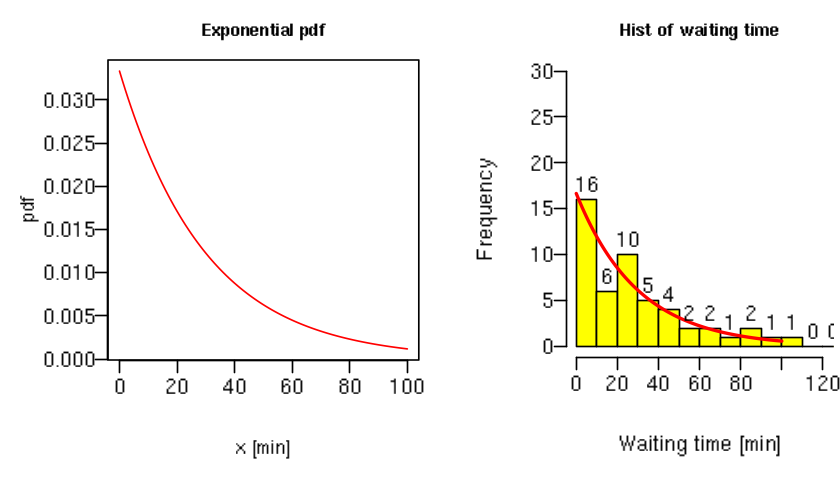

In [3]:
#graphical details
p_area<-matrix(c(1,2),nrow=1, ncol=2, byrow=TRUE)
layout(p_area)
par(mar=c(5.1, 4.1, 4.1, 2.1), mgp=c(3,0.5,0), las=1,mai = c(1, 0.9, 0.5, 0.01))

curve (dexp(x,1/30),0,100,
      lwd=1, 
      col=" red ",
      xlab="x [min]", 
      las=1,
      ylab="pdf", 
      main="Exponential pdf", 
      pch=1,
      cex=0.1,
      cex.lab=0.9,
      cex.main=0.8,
      cex.axis=1
      )
#histogram
par(mar=c(5.1, 6.1, 2.5, .3))    #set distance label plot
binsize<-10
h <- hist(  waiting_time,
            breaks=seq(0,300,binsize),
            col ="yellow",
            xlab = "Waiting time [min]",
            ylim=c(0,30),
            main ="Hist of waiting time",
            cex.main=0.8,
            xlim = c(0,120),
            border="black",
         )

#superimpose the normalized curve
curve (npeople *binsize* dexp(x,1/30),0,100,
      lwd=2, 
      col=" red ",
      add=T  
      )

text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

B) What is the probability that a person will wait for less than 10 minutes ?

From the known distribution we can get easily the probability that a person will wait for less than 10 minutes using the CDF of the exponential distribution, implemented in R in `pexp` 

We can compare this with the value with what we get from our simulated experiment dividing the number of times that a value inside `waiting_time` is less than 10 over the total number of events that is `npeople`=50.

In [4]:
cat("Probability to wait less than 10 minutes from the known model is:\t", pexp(10, 1/30),"\n")
cat("Probability to wait less than 10 minutes from the simulated experiment:\t", length(waiting_time[waiting_time < 10])/npeople, "\n")


Probability to wait less than 10 minutes from the known model is:	 0.2834687 
Probability to wait less than 10 minutes from the simulated experiment:	 0.32 


C) Evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [5]:
cat("E.V. from the simulated experiment:\t", mean(waiting_time), "\n")
cat("E.V. from the known model is:      \t", 30)

E.V. from the simulated experiment:	 29.20996 
E.V. from the known model is:      	 30

D) what is the probability for waiting more than one hour before being received ?

In [6]:
cat("Probability to wait more than 1 hour from the known model is:\t\t", 1-pexp(60, 1/30),"\n")
cat("Probability to wait more than 1 hour from the simulated experiment:\t", length(waiting_time[waiting_time > 60])/npeople, "\n")

Probability to wait more than 1 hour from the known model is:		 0.1353353 
Probability to wait more than 1 hour from the simulated experiment:	 0.14 


## Exercise 3
Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book

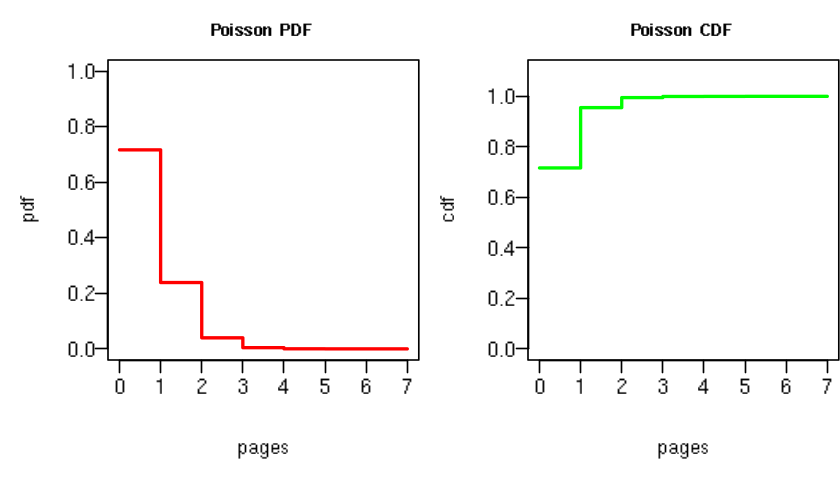

In [7]:
#plot pdf and cdf
library(stats)
options(repr.plot.width=7, repr.plot.height=4) 
p_area<-matrix(c(1,2),nrow=1, ncol=2, byrow=TRUE)
layout(p_area)
par(mar=c(5.1, 4.1, 4.1, 2.1), mgp=c(3,0.5,0), las=1,mai = c(1, 0.9, 0.5, 0.01))

x <- seq(0,7,1) 

plot (x, dpois(x,1/3),
      lwd=2, 
      type="s",
      col=" red ",
      xlab="pages", 
      las=1,
      ylab="pdf", 
      main="Poisson PDF ", 
      pch=1,
      cex=0.1,
      cex.lab=0.9,
      cex.main=0.8,
      cex.axis=1,
      ylim=c(0,1)
      )

plot (x, ppois(x,1/3),
      lwd=2, 
      type="s",
      col=" green ",
      xlab="pages", 
      las=1,
      ylab="cdf", 
      main="Poisson CDF ", 
      pch=1,
      cex=0.1,
      cex.lab=0.9,
      cex.main=0.8,
      cex.axis=1,
      ylim=c(0,1.1)
      )

In [8]:
#prob there is at least one error on a specific page of the book=1-p(0)
cat("The probability that there is at least one error on a specific page of the book is:\t", 1-dpois(0,1/3))

The probability that there is at least one error on a specific page of the book is:	 0.2834687

## Exercise 4
We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.


### Solution:
The single trial is a Bernoulli process with two possibile outcomes:
* I draw an ace
* I do not draw an ace

Therefore, the whole experiment can be described with a binomial distribution $B(x|p, n)$, where x is the number of successes (that are the number of times in which I draw an ace), p is the probability to draw an ace ($p=\frac{4}{52}=\frac{1}{13}$), n is the number of trials.

The probability that at least 10 draws are needed is equivalent to ask for the probability that in the first 9 draws no ace is drawn so 0 successes out of 9 trials with $p=\frac{1}{13}$, that is $$B\left(0|p=\frac{1}{13},n=9 \right)$$

In [9]:
#dbinom(x, size, prob) 0 successes in 9 trials with p=1/13
result <- dbinom(0,9,1/13)

#equivalent to have 1- P(1)-P(2)...P(9)
alternative <- 1- (pbinom(9,9,1/13)-pbinom(0,9,1/13))

#equivalent to have at least 9 failures before the first success = geometric distribution
alternative2 <- 1-pgeom(8,1/13)

cat("The probability that at least 10 draws are needed to draw an ace is:\n",dbinom(0,9,1/13),"\n
Second Method:\n",alternative,"\n 
Third Method:\n",alternative2)



The probability that at least 10 draws are needed to draw an ace is:
 0.4865652 

Second Method:
 0.4865652 
 
Third Method:
 0.4865652

## Exercise 5
The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$$
f (X) =\left\{
\begin{array}{ll}
c(t − 1)(2 − t)& 1<t<2 \\
0 & \text{otherwise}
\end{array}
\right.
$$
where t is the time in hours.


a) using the integrate() R function, determine the constant c (and verify it analytically)

b) write the set of four R functions and plot the pdf and cdf, respectively

c) evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes

In [10]:
#f function
f <- function(x){
    return ((x-1)*(2-x))    
}


norm <- integrate(f, lower = 1, upper = 2)
const <- 1/norm$value

cat("The value of c is given by:\t", const, "\n")


#define the integral of the function:
f_int <- function(x){
    return (-x^3/3+3*x^2/2-2*x)    
}

cat("Analitically:\t\t\t", 1/(f_int(2)-f_int(1)))




The value of c is given by:	 6 
Analitically:			 6

b) write the set of four R functions and plot the pdf and cdf, respectively

In [11]:
#define the piecewise pdf
df <- function(x){
    df <- NULL
    df[ x>1 & x<2] <- const*(x[ x>1 & x<2]-1)*(2-x[ x>1 & x<2])
    df[x<=1 | x>=2] <- 0
    df
}


#define the cumulative as a piecewise
pf <- function(x){
    pf <- NULL
    pf[x<=1] <- 0
    pf[x>=2 ] <- 1
    pf[ x>1 & x<2] <- const*(f_int(x[x>1 & x<2])-f_int(1))
    pf
       
}




#define a function to put equal to zero to find the root
zero_func <- function(x, q){
    return (const*(f_int(x)-f_int(1)) - q )
}

#define the quantile function
qf <- function(p)
    {
    if(p < 0 | p > 1){
        message <-"The argument of qf must be in the interval [0-1]"
        return (message)
    }
    
    return (uniroot(zero_func,interval=c(1,2.), q=p)$root)    
}


#define routine to generate random numbers (using inverse method )
rf <- function(size=1000){
    uni_vec <- runif(size)       #
    gen_num <- rep(0,size)
    for (i in 1:size)
        {
            gen_num[i] <- qf(uni_vec[i])
        }
    return (gen_num)
}


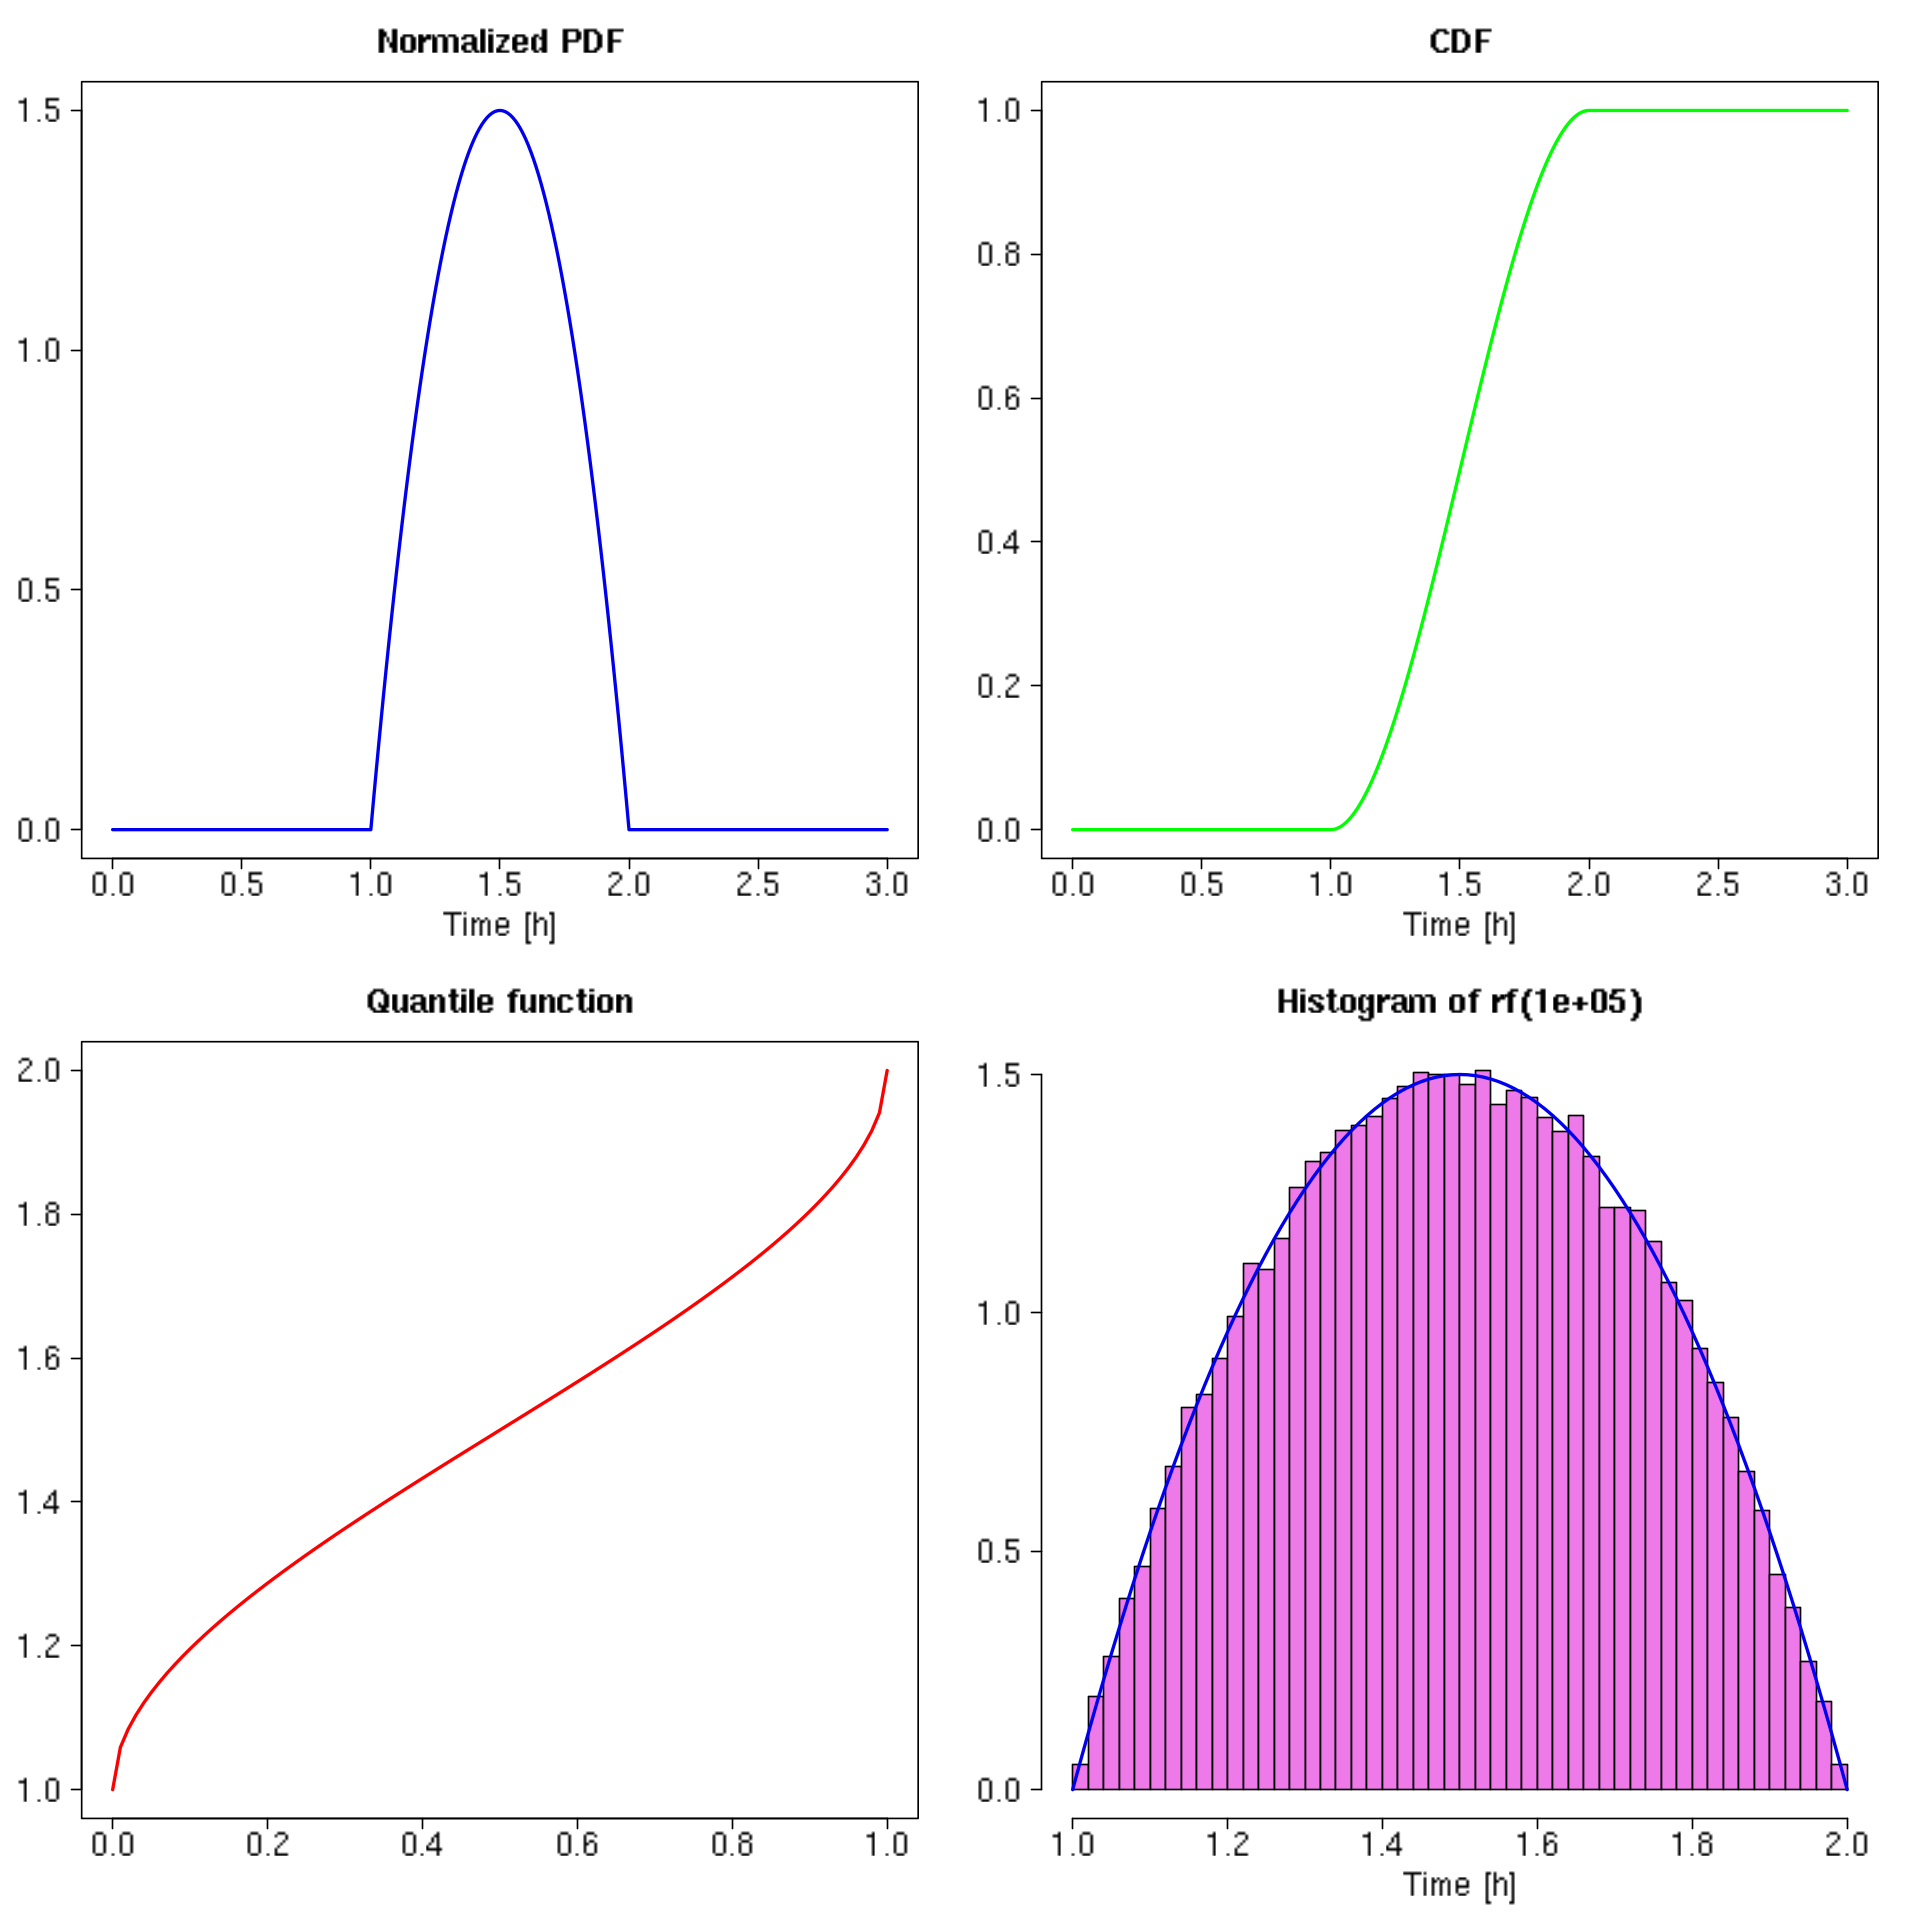

In [12]:
#GRAPHIC   
options(repr.plot.width=16, repr.plot.height=16) 
p_area<-matrix(c(1,2, 3, 4),nrow=2, ncol=2, byrow=TRUE)
layout(p_area)


t <- seq(0, 3 , 0.01)
#plot PDF
plot( t, 
      df(t), 
      main="Normalized PDF",
      type="l",
      col="blue2",
      xlab="Time [h]",
      ylab=" ",
      lwd=2,
      cex.lab=1.9,
     cex.main=1.9,
     cex.axis=1.9,
     las=1,
      xlim=c(-0,3)
     )
#plot CDF
plot( t, 
      pf(t), 
      main="CDF",
      type="l",
      xlab="Time [h]",
      ylab=" ",
      col="green",
      lwd=2,
           cex.lab=1.9,
     cex.main=1.9,
     cex.axis=1.9,
     las=1,
      xlim=c(-0,3)
     )

#new sequence needed between 0 and 1 for the quantile function
x <- seq(0,1, 0.01)
#quantile values for each 
y <- rep(0, length(x))
for (i in 1:length(x)){
    y[i] <- qf(x[i])
}

plot( x, 
      y, 
      main="Quantile function",
      type="l",
      col="red",
      xlab=" ",
      ylab=" ",
      lwd=2,
           cex.lab=1.9,
     cex.main=1.9,
     cex.axis=1.9,
     las=1,
      xlim=c(-0,1)
     )


#try the quantile function
hist(rf(100000),
     breaks=40,
     col="orchid2",
     freq=FALSE,
     xlab="Time [h]",
     ylab=" ",
           cex.lab=1.9,
     cex.main=1.9,
     cex.axis=1.9,
     las=1,
     #lty="red"
    )
curve( 
     df(x), from=1, to=2, 
     type="l",
     col="blue2",
     ylab=" ",
     lwd=2,
     add=TRUE
     )


c) Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes

The probability that the student will finish the aptitude test in more than 75 minutes is given by the integral of the PDF between 1.25 and 2 that is equivalent to compute the difference between the cumulative F(2) - F(1.25)

In [13]:
cat("probability to finish the aptitude test in more than 75 minutes:\t", pf(2)-pf(1.25))

probability to finish the aptitude test in more than 75 minutes:	 0.84375

The probability to finish it between 90 and 120 minutes is given by F(2)-F(1.5)

In [14]:
cat("probability to finish the aptitude test in between 90 and 120 minutes:\t", pf(2)-pf(1.5))

probability to finish the aptitude test in between 90 and 120 minutes:	 0.5

## Exercise 6
The lifetime of tires sold by an used tires shop is $10^4 x$ km, where x is a random variable following the distribution funcion
$$
f (X) =\left\{
\begin{array}{ll}
\frac{2}{x^2}& 1<x<2 \\
0 & \text{otherwise}
\end{array}
\right.
$$
a) write the set of four R functions and plot the pdf and cdf, respectively

b) determine the probability that tires will last less than 15000 km

c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $\text{Var}(X) = E[X^2] − E[X]^2$

In [15]:
#this time using thee ifelse:

#pdf
dtires <- function(x){
    return (ifelse( 1<x & x<2 , 2/x^2, 0))
}


#cumulative
ptires <- function(x){
    return (ifelse(x<=1,0,ifelse(x>=2,1,2-2/x)))
      
}


#quantile
qtires <- function(p){
    if(p < 0 | p > 1){
        message <-"The argument of qf must be in the interval [0-1]"
        return (message)
    }
    #anonymous function to be solved
    return (uniroot(
                        function(x, q) {return ( -2/x +2-q)} ,interval=c(1,2), q=p)$root
           )
}

#define routine to generate random numbers (using inverse method )
rtires <- function(size=1000){
    uni_vec <- runif(size)
    gen_num <- rep(0,size)
    for (i in 1:size)
        {
            gen_num[i] <- qtires(uni_vec[i])
        }
    return (gen_num)
}

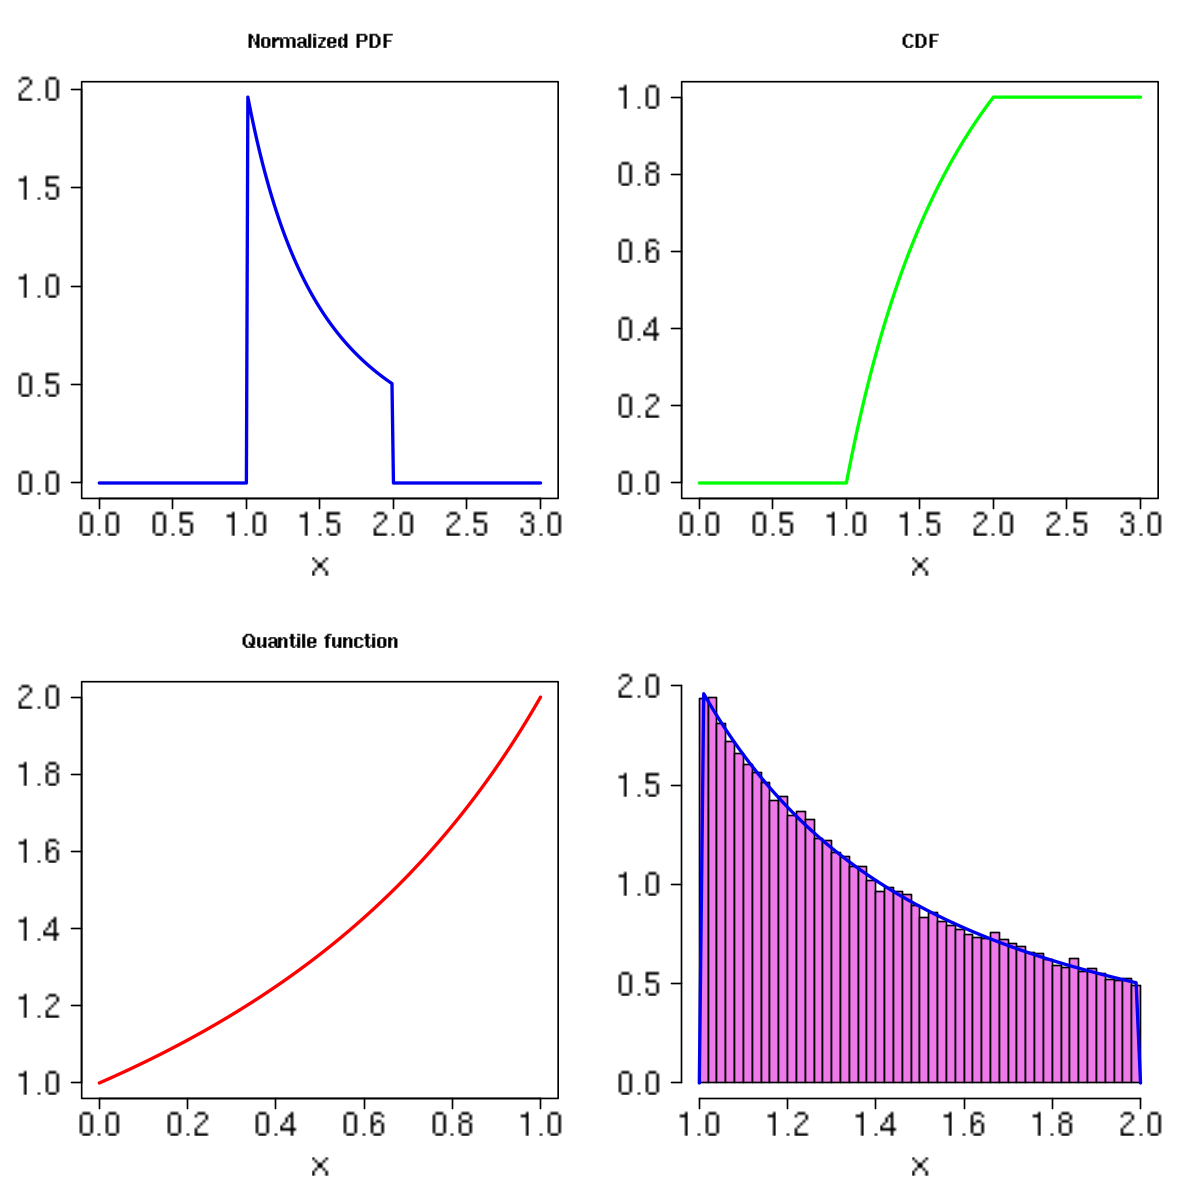

In [16]:
options(repr.plot.width=10, repr.plot.height=10)
p_area<-matrix(c(1,2, 3, 4),nrow=2, ncol=2, byrow=TRUE)
layout(p_area)


t <- seq(0, 3 , 0.01)
#plot PDF
plot( t, 
      dtires(t), 
      main="Normalized PDF",
      type="l",
      col="blue2",
      xlab="x",
      ylab=" ",
     cex.lab=1.9,
     cex.main=1.1,
     cex.axis=1.9,
     las=1,
      lwd=2,
     
      xlim=c(-0,3)
     )
#plot CDF
plot( t, 
      ptires(t), 
      main="CDF",
      type="l",
      xlab="x",
      ylab=" ",
     cex.lab=1.9,
     cex.main=1.1,
     cex.axis=1.9,
     las=1,
     
      col="green",
      lwd=2,
      xlim=c(-0,3)
     )

#new sequence needed between 0 and 1 for the quantile function
x <- seq(0,1, 0.01)
#quantile values for each 
y <- rep(0, length(x))
for (i in 1:length(x)){
    y[i] <- qtires(x[i])
}

plot( x, 
      y, 
      main="Quantile function",
      type="l",
      col="red",
      xlab="x",
      ylab=" ",
      lwd=2,
     cex.lab=1.9,
     cex.main=1.1,
     cex.axis=1.9,
     las=1,
     
      xlim=c(-0,1)
     )

#try the quantile function and the routine to generate
hist(rtires(100000),
     breaks=40,
     col="orchid2",
     freq=FALSE,
     main=" ",
     ylab=" ",
     cex.lab=1.9,
     cex.main=1.1,
     cex.axis=1.9,
     las=1,
     xlab="x"
    )

curve( 
     dtires(x), from=1, to=2, 
     type="l",
     col="blue2",
     ylab=" ",
     lwd=2,
     add=TRUE
     )



b) determine the probability that tires will last less than 15000 km

Again we can use directly the cumulative function defined above:
$$ 10^4 \cdot x \leq 15000\rightarrow x\leq1.5 $$ 

In [17]:
cat("The probability that tires will last less than 15000 km is:\t",ptires(1.5))

The probability that tires will last less than 15000 km is:	 0.6666667

c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $\text{Var}(X) = E[X^2] − E[X]^2$

Mean:	 1.387963 
Var :	 0.07626975 


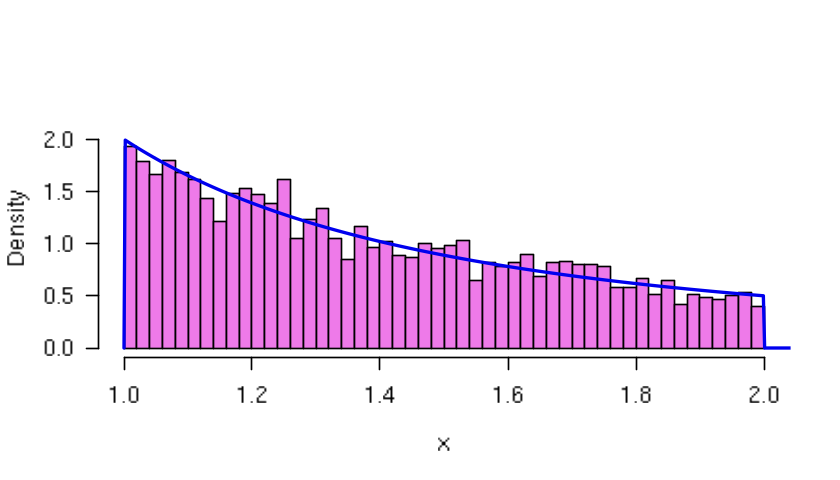

In [18]:
#generation with the routine already defined
rv <- rtires(3000)
cat("Mean:\t", mean(rv),"\n")

cat("Var :\t", mean(rv*rv)-mean(rv)**2,"\n")

options(repr.plot.width=7, repr.plot.height=4) 
hist(rv,
     breaks=40,
     col="orchid2",
     freq=FALSE,
     xlab="x",
     main=" ",
     cex.lab=1.1,
     ylim=c(0,2.3),
     cex.axis=1.1,
     las=1,
     
    )

curve( 
     dtires(x), from=1, to=3, 
     type="l",
    n=1000,
     col="blue2",
     ylab=" ",
     lwd=2,
     add=TRUE
     )
